# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [42]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

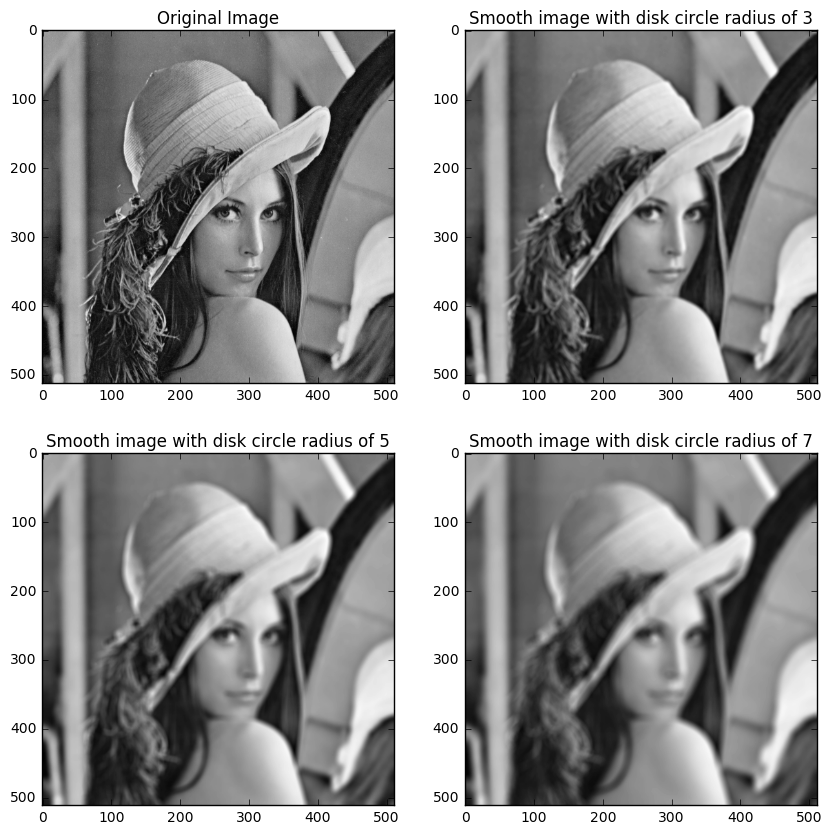

In [52]:
# loading the lena image
filepath = "./images/lena-grey.bmp"
Lena = io.imread(filepath)


#disk circle radius
r1 = 3
r2 = 5
r3 = 7

# importation of the mean and disk function 
from skimage.filters.rank import mean
from skimage.morphology import disk
# application on the image
smoothing = mean(Lena,disk(r1))
smoothing2 = mean(Lena,disk(r2))
smoothing3 = mean(Lena,disk(r3))


#Displaying the figure

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(Lena, cmap=cm.gray)
ax0.set_title('Original Image')

ax1.imshow(smoothing, cmap=cm.gray)
ax1.set_title('Smooth image with disk circle radius of 3')

ax2.imshow(smoothing2, cmap=cm.gray)
ax2.set_title('Smooth image with disk circle radius of 5')

ax3.imshow(smoothing3, cmap=cm.gray)
ax3.set_title('Smooth image with disk circle radius of 7')

#----------------------OBSERVATION------------------------
# We can observe that more we increase the value of the 
# disk circle radius more the image is smooth.
#--------------------------------------------------------

### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

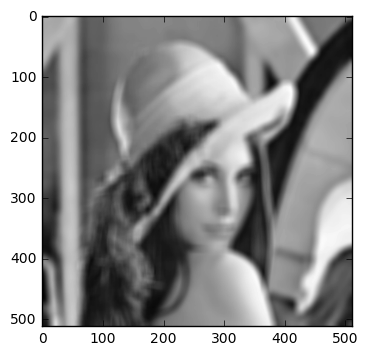

In [37]:
# using the mean mask 
mean_mask = np.ones((14,14), dtype = float)
#normalize
mean_mask /= np.sum(np.sum(mean_mask))
#using filters.convolve
from scipy import ndimage

#compute the convolution

lena_conv = ndimage.filters.convolve(Lena, mean_mask)

#plotting the figure
plt.figure
plt.imshow(lena_conv, cmap= cm.gray)
plt.show()

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [38]:
from skimage import filters

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

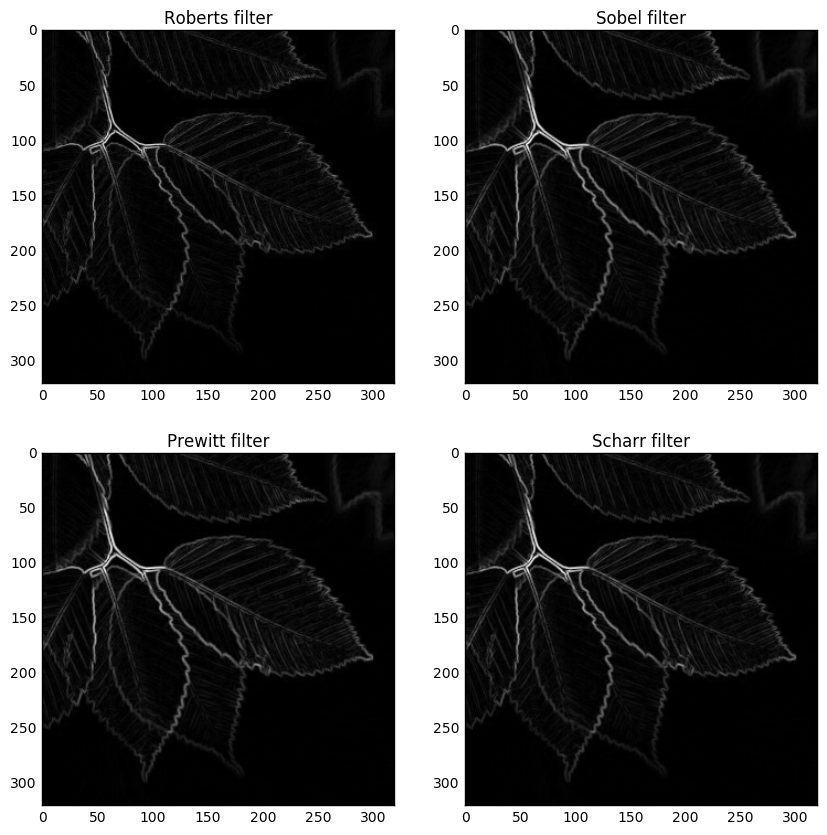

In [51]:
# load the image
filepath1 = './images/leaves.jpg'
image = io.imread(filepath1, as_grey = True)
image1 = img_as_float(image)

#applying the filter
Ro= filters.roberts(image1)
So= filters.sobel(image1)
Pr= filters.prewitt(image1)
Sc= filters.scharr(image1)

#displaying 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(Ro, cmap=cm.gray)
ax0.set_title('Roberts filter')

ax1.imshow(So, cmap=cm.gray)
ax1.set_title('Sobel filter')

ax2.imshow(Pr, cmap=cm.gray)
ax2.set_title('Prewitt filter')

ax3.imshow(Sc, cmap=cm.gray)
ax3.set_title('Scharr filter')


**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

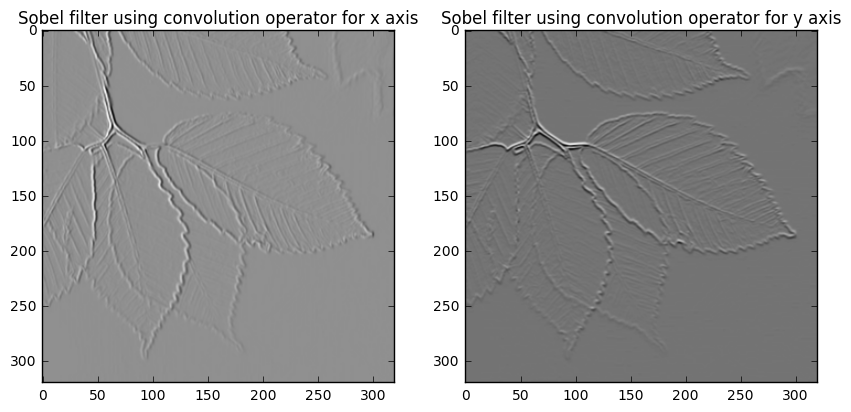

In [77]:
# applying the sobel filter on the leave image
So= filters.sobel(image1)

# sobel operator in horizontal
sobel_op_x = np.array([[1,0,-1], [2, 0, -2],[1, 0, -1]])/4

# sobel operator in vertical
sobel_op_y = np.array([[1,2,1], [0, 0, 0],[-1, -2, -1]])/4


#using filters.convolve
from scipy import ndimage

#compute the convolution
leaves_conv_x = ndimage.filters.convolve(So, sobel_op_x)
leaves_conv_y = ndimage.filters.convolve(So, sobel_op_y)

#plotting the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax0, ax1 = axes.ravel()

ax0.imshow(leaves_conv_x, cmap=cm.gray)
ax0.set_title('Sobel filter using convolution operator for x axis')

ax1.imshow(leaves_conv_y, cmap=cm.gray)
ax1.set_title('Sobel filter using convolution operator for y axis')

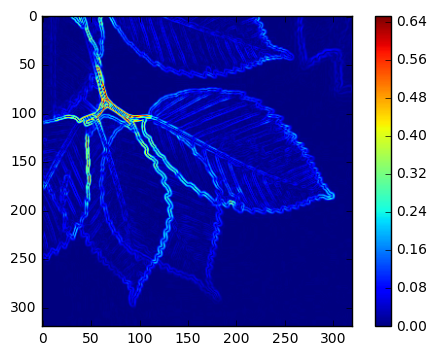

In [86]:
#computing the magnitude
A = (leaves_conv_x)**2
B = (leaves_conv_y)**2
magnitude = np.sqrt (A + B)
#plotting
plt.imshow(magnitude)
plt.colorbar() # to show the level 
plt.show()

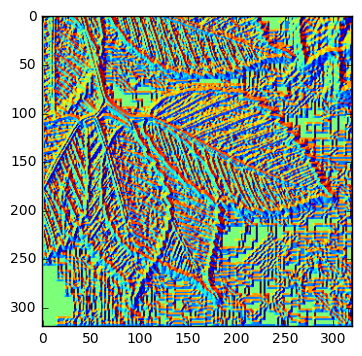

In [83]:
#compute the angle 
angle = np.arctan2(leaves_conv_y, leaves_conv_x)
#plotting
plt.figure()
plt.imshow(angle)
plt.show()


### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

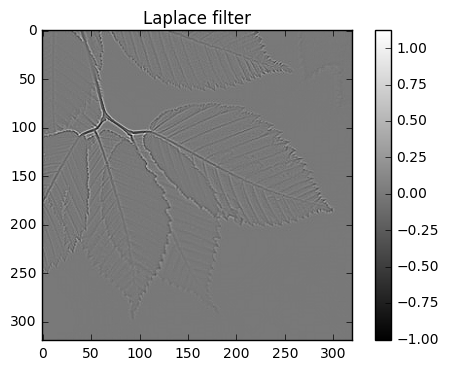

In [95]:
# appliying the Laplace filter on the leave image
La= filters.laplace(image1)

#displaying
plt.figure()
plt.imshow(La, cmap=cm.gray)
plt.title('Laplace filter')
plt.colorbar()
plt.show()

### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

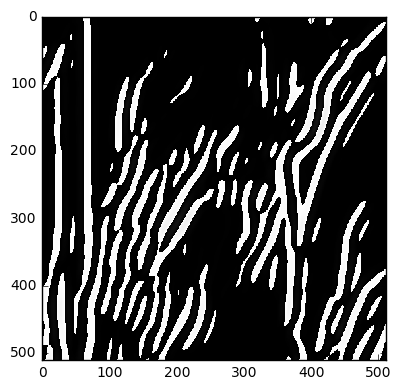

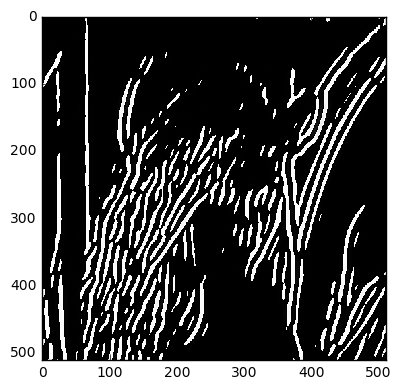

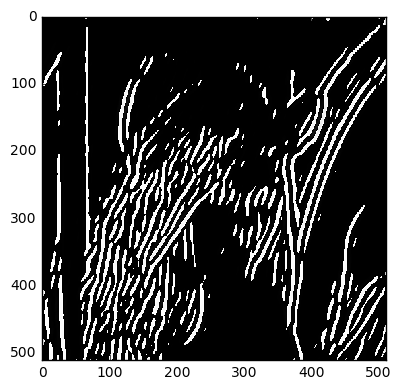

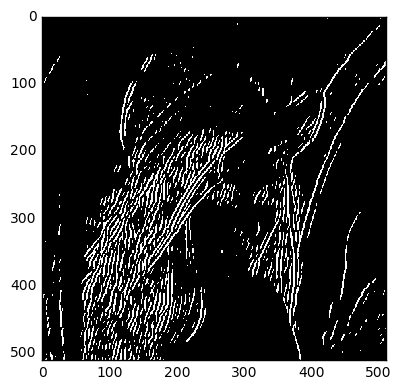

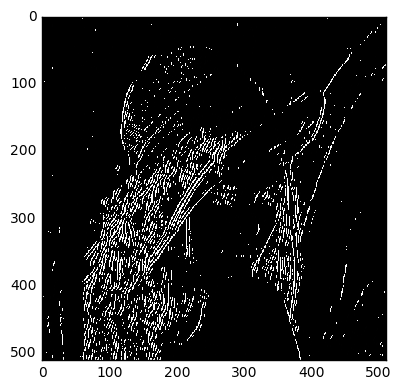

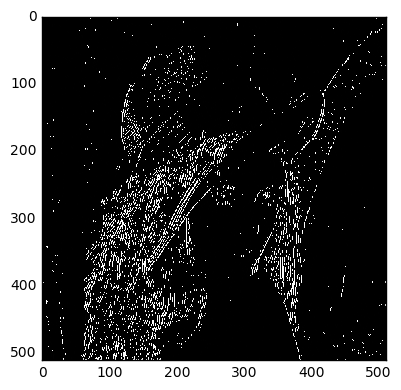

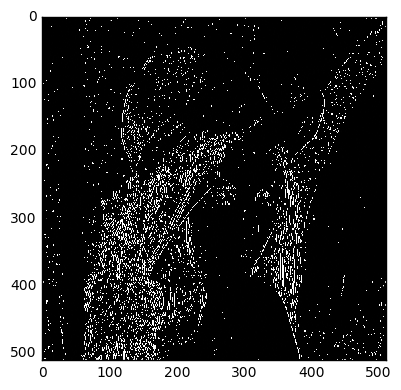

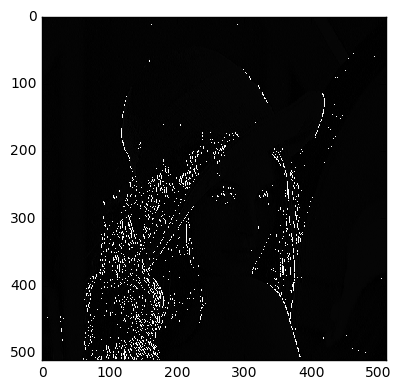

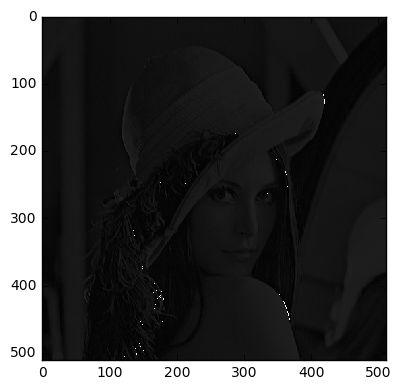

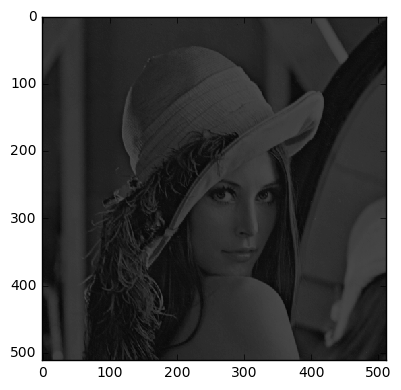

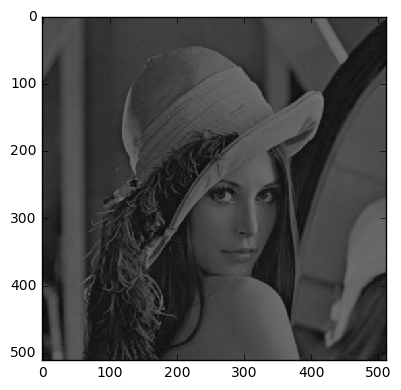

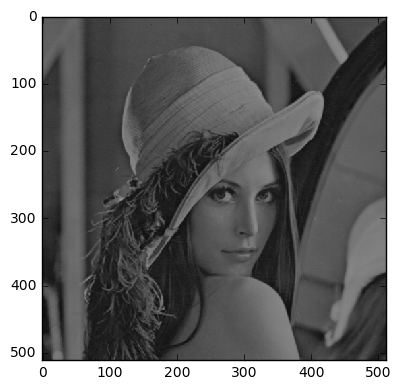

In [106]:
#loading lena image
filepath3 = './images/lena-grey.bmp'
Lena_G = io.imread(filepath3, as_grey= True)

# list of frequency
freq = [0.05, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# importing the necessary library
from skimage.filters import gabor
# gabor filtering
for f in freq:
    filt_real, filt_imag = gabor(Lena_G, frequency=f, theta=60)


    #plotting
    plt.figure()            
    io.imshow(filt_real)    
    io.show() 
#-----------------------------OBSERVATION------------------------------------------
# We can observe than more we increase the value of the frequancy range 
# more we obtain the edges of Lena image. If we increase the value of the frequency
# above 0.6 we have the real image and not only the detection of the edges of Lena.
#-----------------------------------------------------------------------------------

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [103]:
from skimage import util

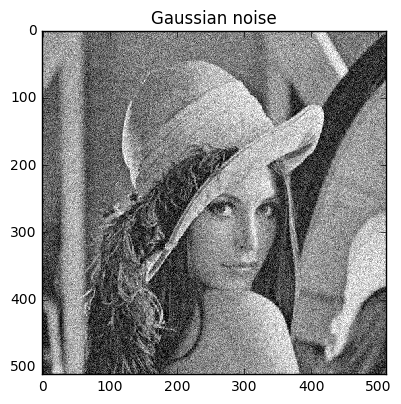

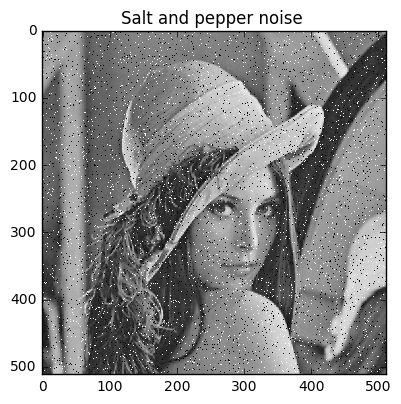

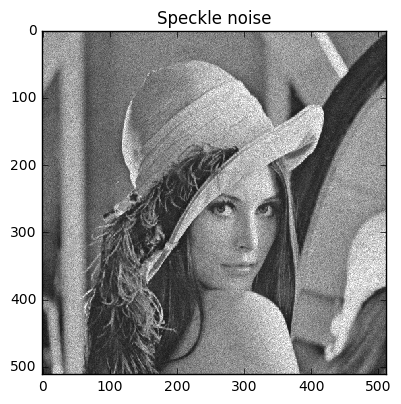

In [109]:
#corrupted image
lena_gaussian = util.random_noise(Lena, mode='gaussian')
lena_sp = util.random_noise(Lena, mode='s&p')
lena_speckle = util.random_noise(Lena, mode='speckle')

#random_noise(Lena, mode='gaussian', seed=None, clip=True, **kwargs)

#plotting
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise ')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')
plt.show()


**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

C:\Users\Selma\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


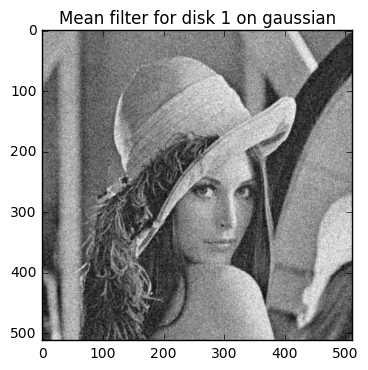

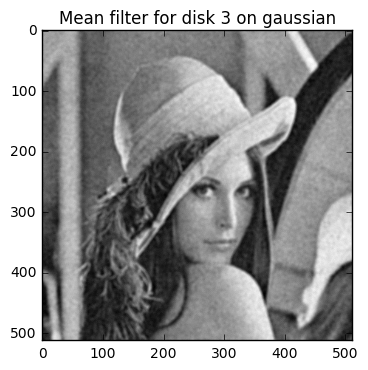

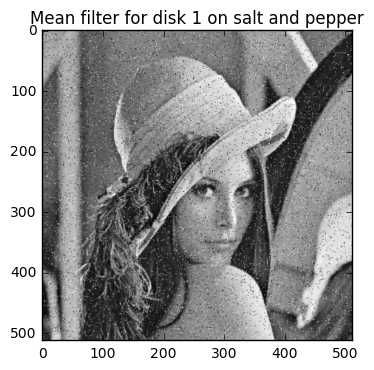

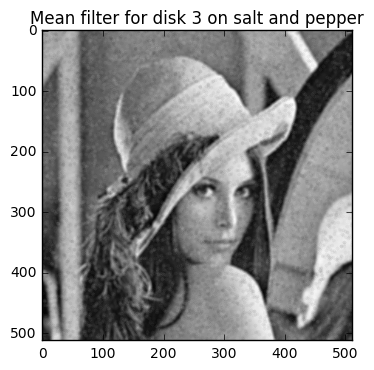

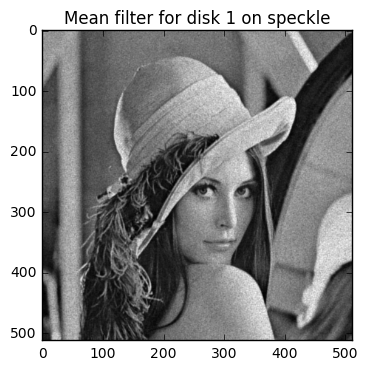

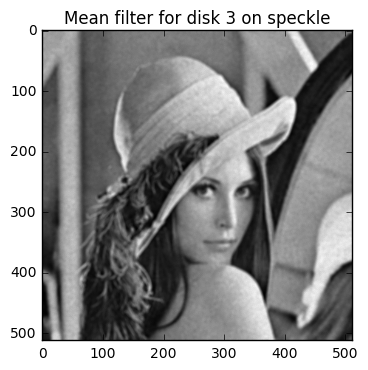

In [119]:
#applying  mean filter on the corrupted image
lena_Ga=mean(lena_gaussian, disk(1))
lena_Ga1=mean(lena_gaussian, disk(3))

lena_Sp=mean(lena_sp, disk(1))
lena_Sp1=mean(lena_sp, disk(3))

lena_Spc=mean(lena_speckle, disk(1))
lena_Spc1=mean(lena_speckle, disk(3))


#plotting
plt.figure()
plt.imshow(lena_Ga, cmap=cm.gray)
plt.title('Mean filter for disk 1 on gaussian')
plt.show()

plt.figure()
plt.imshow(lena_Ga1, cmap=cm.gray)
plt.title('Mean filter for disk 3 on gaussian')
plt.show()

plt.figure()
plt.imshow(lena_Sp, cmap=cm.gray)
plt.title('Mean filter for disk 1 on salt and pepper')
plt.show()

plt.figure()
plt.imshow(lena_Sp1, cmap=cm.gray)
plt.title('Mean filter for disk 3 on salt and pepper')
plt.show()
    
plt.figure()
plt.imshow(lena_Spc, cmap=cm.gray)
plt.title('Mean filter for disk 1 on speckle')
plt.show()

plt.figure()
plt.imshow(lena_Spc1, cmap=cm.gray)
plt.title('Mean filter for disk 3 on speckle')
plt.show()


** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

C:\Users\Selma\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


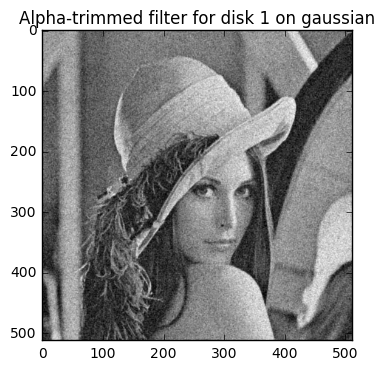

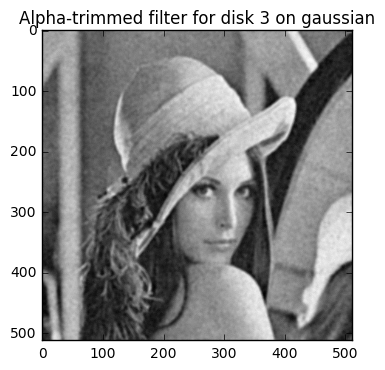

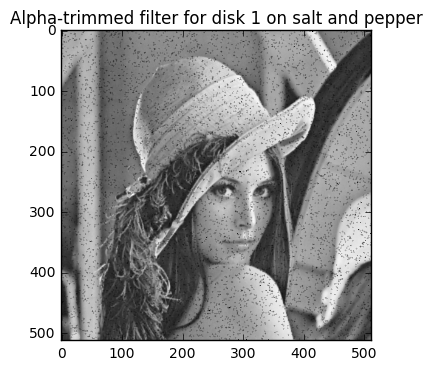

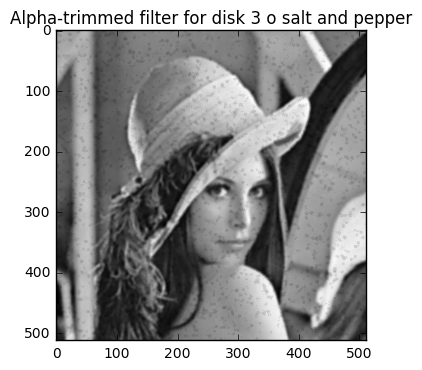

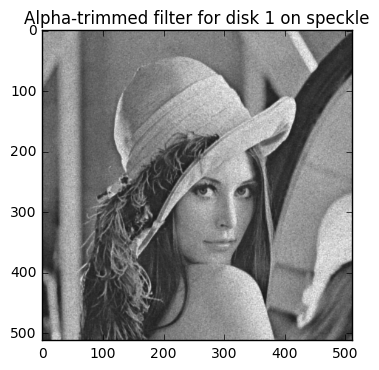

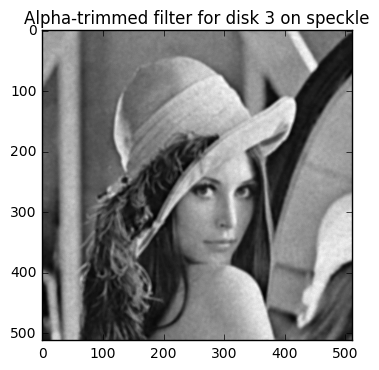

In [120]:
from skimage.filters.rank import mean_percentile
#applying alpha-trimmed mean filter on the corrupted image
lena_Ga2=mean_percentile(lena_gaussian, disk(1), p0=0.05, p1=0.95)
lena_Ga21=mean_percentile(lena_gaussian, disk(3), p0=0.05, p1=0.95)

lena_Sp2=mean_percentile(lena_sp, disk(1), p0=0.05, p1=0.95)
lena_Sp21=mean_percentile(lena_sp, disk(3), p0=0.05, p1=0.95)

lena_Spc2=mean_percentile(lena_speckle, disk(1), p0=0.05, p1=0.95)
lena_Spc21=mean_percentile(lena_speckle, disk(3), p0=0.05, p1=0.95)


#plotting
plt.figure()
plt.imshow(lena_Ga2, cmap=cm.gray)
plt.title('Alpha-trimmed filter for disk 1 on gaussian')
plt.show()

plt.figure()
plt.imshow(lena_Ga21, cmap=cm.gray)
plt.title('Alpha-trimmed filter for disk 3 on gaussian')
plt.show()

plt.figure()
plt.imshow(lena_Sp2, cmap=cm.gray)
plt.title('Alpha-trimmed filter for disk 1 on salt and pepper')
plt.show()

plt.figure()
plt.imshow(lena_Sp21, cmap=cm.gray)
plt.title('Alpha-trimmed filter for disk 3 o salt and pepper')
plt.show()
    
plt.figure()
plt.imshow(lena_Spc2, cmap=cm.gray)
plt.title('Alpha-trimmed filter for disk 1 on speckle')
plt.show()

plt.figure()
plt.imshow(lena_Spc21, cmap=cm.gray)
plt.title('Alpha-trimmed filter for disk 3 on speckle')
plt.show()

** Q.7.3 median filter: **

C:\Users\Selma\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


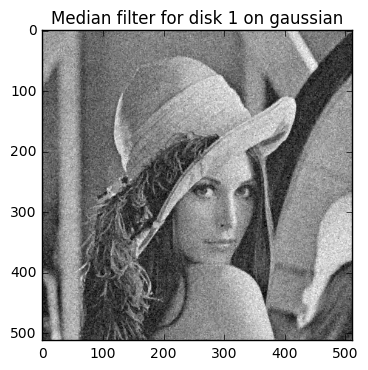

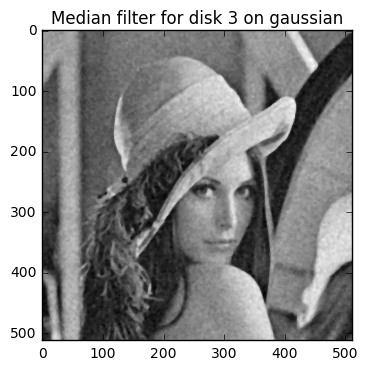

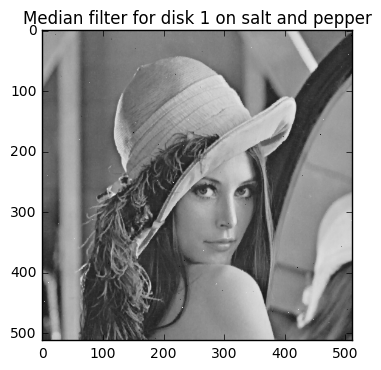

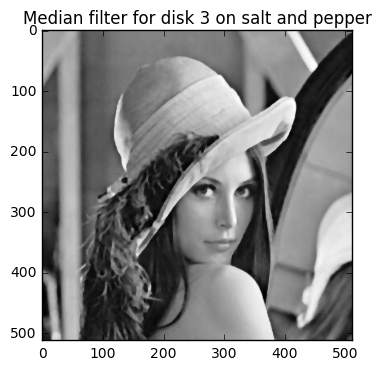

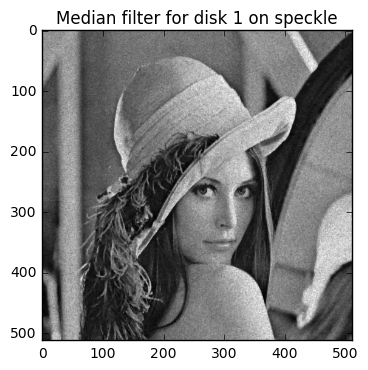

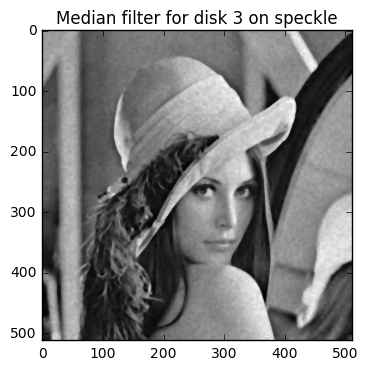

In [122]:
#importing the necessary library
from skimage.filters.rank import median

#applying  mean filter on the corrupted image
lena_Ga3=median(lena_gaussian, disk(1))
lena_Ga31=median(lena_gaussian, disk(3))

lena_Sp3=median(lena_sp, disk(1))
lena_Sp31=median(lena_sp, disk(3))

lena_Spc3=median(lena_speckle, disk(1))
lena_Spc31=median(lena_speckle, disk(3))


#plotting
plt.figure()
plt.imshow(lena_Ga3, cmap=cm.gray)
plt.title('Median filter for disk 1 on gaussian')
plt.show()

plt.figure()
plt.imshow(lena_Ga31, cmap=cm.gray)
plt.title('Median filter for disk 3 on gaussian')
plt.show()

plt.figure()
plt.imshow(lena_Sp3, cmap=cm.gray)
plt.title('Median filter for disk 1 on salt and pepper')
plt.show()

plt.figure()
plt.imshow(lena_Sp31, cmap=cm.gray)
plt.title('Median filter for disk 3 on salt and pepper')
plt.show()
    
plt.figure()
plt.imshow(lena_Spc3, cmap=cm.gray)
plt.title('Median filter for disk 1 on speckle')
plt.show()

plt.figure()
plt.imshow(lena_Spc31, cmap=cm.gray)
plt.title('Median filter for disk 3 on speckle')
plt.show()


## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

<function matplotlib.pyplot.show>

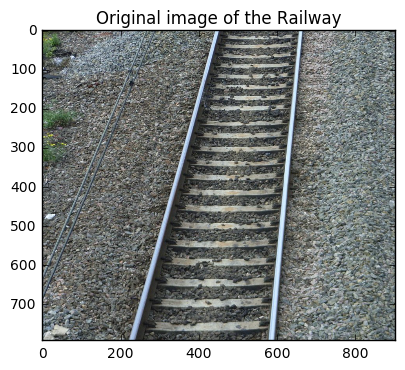

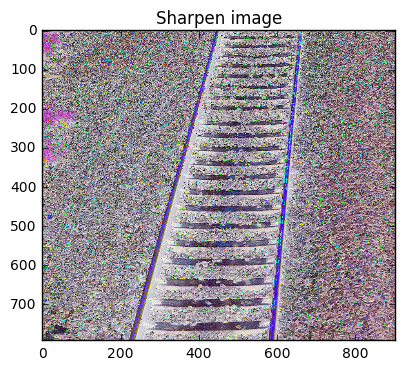

In [128]:
#loading the railway image 
filepath_r='./images/railway.jpg'
Railway = io.imread(filepath_r, as_gray=True)

# appliying the Laplace filter on the railway image
La_R= filters.laplace(Railway)

#sharpening the image
I = Railway - La_R

# plotting
plt.figure()
plt.imshow(Railway,cmap=cm.gray)
plt.title('Original image of the Railway')
plt.show

plt.figure()
plt.imshow(I)
plt.title('Sharpen image')
plt.show

#------------Comment---------------------------------------
# the color image doesn't want to convert to the gray level

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**